# Text Analysis and Visualization with Python and the NLTK

This notebook was originally prepared for use during a workshop called "An Introduction to Visualizing Text with Python," which took place during [Columbia's Art of Data Visualization week](http://library.columbia.edu/news/events/data-visualization.html) in April 2016. But you can run these commands yourself. To begin, you'll need this software: 

 * Python 3
 * These Python 3 packages (make sure you don't install their Python 2 versions): 
   - Jupyter (formerly called iPython Notebook) 
   - NLTK (the Natural Language Processing Toolkit) 
   - Pandas (a data science library) 
   - Wordcloud

There are lots of different ways to get this software. You can either install it on your computer, or run it in the cloud. Here are a few different ways of doing that. When you see text in a `monospace typeface`, those are commands to be entered in the terminal. On a Mac, open a terminal by typing "Terminal" into Spotlight. On Windows, press Win+R and type `cmd` to get a terminal.  

## Installation on Linux

1. Make sure your package list is up to date: `sudo apt-get update`
1. Get Python 3: `sudo apt-get install python3 python3-pip python3-pandas`
2. Get the Python packages: `sudo pip3 install jupyter nltk wordcloud`
3. Start a Jupyter notebook: `jupyter notebook`

## Installation on Mac or Windows: 

1. Get Anaconda with Python 3 from https://www.continuum.io/downloads
2. Anaconda comes with Pandas, NLTK, and Jupyter, so just install Wordcloud: `conda install --name wordcloud`
3. Start Jupyter Notebooks by clicking "launch" under "Jupyter Notebook." 
4. Make a new Python 3 Jupyter Notebook by clicking the menu "New," then "Python 3." 

## Or Use DHBox

1. Go to http://dhbox.org and click "log in." Log into the workshop box with the credentials I gave earlier. 
2. In the "dataviz-2017" profile menu in the top right, click "Apps." 
2. Click the "Jupyter Notebook" tab. 
3. Make a new Jupyter Notebook by clicking the menu "New," then "Python 3." 

<!-- 
## Installation on DHBox 

DHBox is a platform for running digital humanities (DH) software in the cloud. 

1. Make a DHBox account on http://dhbox.org, by clicking "sign up."  2. In your user menu in the upper-right corner, select "Apps." 
3. Click the tab "Command Line." 
4. Enter the commands from the section "Installation on Linux" above. 
5. Click the tab "Jupyter Notebooks," and enter your password again. 

One you have all the software installed, you can run the commands below either by copying and pasting them from this notebook, or by running them directly in this notebook, by downloading the notebook and opening it with jupyter (i.e. `jupyter notebook dataviz-workshop.ipynb`). 
-->

In [1]:
# Get the Natural Language Processing Toolkit
import nltk

In [ ]:
nltk.download('book') # You only need to run this command once, to get the NLTK book data. 

In [3]:
# Get the data science package Pandas
import pandas as pd

# Get the library matplotlib for making pretty charts
import matplotlib
import matplotlib.pyplot as plt

# Make plots appear here in this notebook
%matplotlib inline

# This just makes the plot size bigger, so that we can see it easier. 
plt.rcParams['figure.figsize'] = (12,4)

# We'll use the OS module to download things. 
import os

# Get all the example books from the NLTK textbook
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Work with our Own Text

In [4]:
# Download Alice in Wonderland
os.system('wget http://www.gutenberg.org/files/11/11-0.txt') 

0

In [5]:
# Tokenize it (break it into words), and make an NLTK Text object out of it. 
aliceRaw = open('11-0.txt').read()
aliceWords = nltk.word_tokenize(aliceRaw)
alice = nltk.Text(aliceWords)

In [6]:
alice

<Text: ﻿Project Gutenberg’s Alice’s Adventures in Wonderland , by...>

## Exploring Texts

Let's explore these texts a little. There are lots of things we can do with these texts. 
To see a list, type `text1.` and press `<Tab>`. One thing we can do is look at statistically significant co-occurring two-word phrases, here known as *collocations*: 

In [7]:
text1.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


In [8]:
text2.collocations()

Colonel Brandon; Sir John; Lady Middleton; Miss Dashwood; every thing;
thousand pounds; dare say; Miss Steeles; said Elinor; Miss Steele;
every body; John Dashwood; great deal; Harley Street; Berkeley Street;
Miss Dashwoods; young man; Combe Magna; every day; next morning


But what if we get tired of doing that for each text, and want to do it with all of them? 
Let's put the texts into a list.

In [9]:
alltexts = [text1, text2, text3, text4, text5, text6, text7, text8, text9, alice]

Let's look at it to make sure it's all there. 

In [10]:
alltexts

[<Text: Moby Dick by Herman Melville 1851>,
 <Text: Sense and Sensibility by Jane Austen 1811>,
 <Text: The Book of Genesis>,
 <Text: Inaugural Address Corpus>,
 <Text: Chat Corpus>,
 <Text: Monty Python and the Holy Grail>,
 <Text: Wall Street Journal>,
 <Text: Personals Corpus>,
 <Text: The Man Who Was Thursday by G . K . Chesterton 1908>,
 <Text: ﻿Project Gutenberg’s Alice’s Adventures in Wonderland , by...>]

Now that we have a list of all the texts, we can loop through each one, running the `collocations()` function on each: 

In [11]:
for text in alltexts:     # For each text in the list "alltexts,"
    text.collocations()   # Get the collocations
    print('---')          # Print a divider between the collocations

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand
---
Colonel Brandon; Sir John; Lady Middleton; Miss Dashwood; every thing;
thousand pounds; dare say; Miss Steeles; said Elinor; Miss Steele;
every body; John Dashwood; great deal; Harley Street; Berkeley Street;
Miss Dashwoods; young man; Combe Magna; every day; next morning
---
said unto; pray thee; thou shalt; thou hast; thy seed; years old;
spake unto; thou art; LORD God; every living; God hath; begat sons;
seven years; shalt thou; little ones; living creature; creeping thing;
savoury meat; thirty years; every beast
---
United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; Old
World; Almighty God; Fellow citizens; Chief Magistrate; Chief Justice;
God bless; every citize

## Concordances and Dispersion Plots

Now let's look up an individual word in a text, and have NLTK give us some context: 

In [12]:
text6.concordance('shrubbery')

Displaying 13 of 13 matches:
want ? HEAD KNIGHT : We want ... a shrubbery ! [ dramatic chord ] ARTHUR : A wh
ase ! No more ! We will find you a shrubbery . HEAD KNIGHT : You must return he
IGHT : You must return here with a shrubbery or else you will never pass throug
d fair , and we will return with a shrubbery . HEAD KNIGHT : One that looks nic
 in this town where we could buy a shrubbery ? [ dramatic chord ] OLD CRONE : W
 do not tell us where we can buy a shrubbery , my friend and I will say ... we 
s of Ni , we have brought you your shrubbery . May we go now ? HEAD KNIGHT : It
o now ? HEAD KNIGHT : It is a good shrubbery . I like the laurels particularly 
irstly , you must find ... another shrubbery ! [ dramatic chord ] ARTHUR : Not 
matic chord ] ARTHUR : Not another shrubbery ! RANDOM : Ni ! HEAD KNIGHT : Then
T : Then , when you have found the shrubbery , you must place it here beside th
you must place it here beside this shrubbery , only slightly higher so you get 
T : Then , 

Not bad. But what if we want to see visually where those words occur over the course of the text? We can use the function `dispersion_plot`:

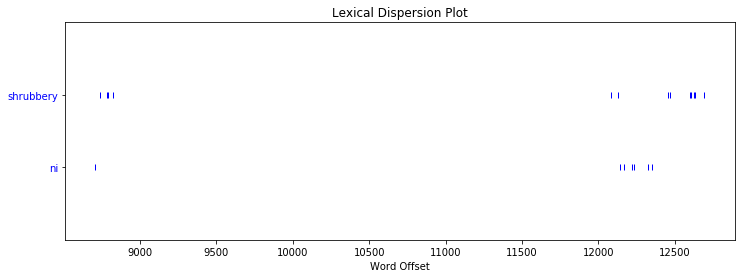

In [13]:
text6.dispersion_plot(['shrubbery', 'ni'])

Let's try that on Moby Dick: 

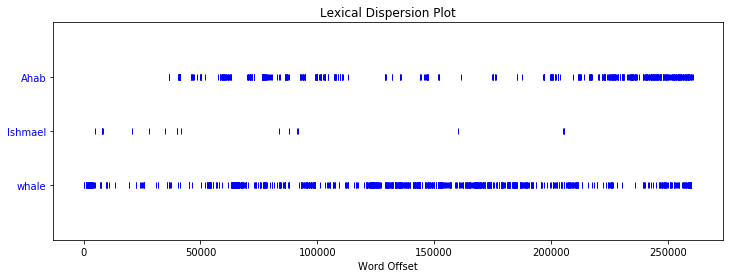

In [14]:
text1.dispersion_plot(['Ahab', 'Ishmael', 'whale'])

By looking at dispersion plots of characters' names, we can almost tell which characters in Sense and Sensibility have romantic relationships: 

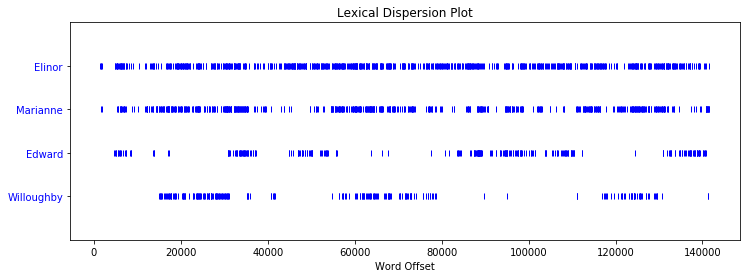

In [15]:
text2.dispersion_plot(['Elinor', 'Marianne', 'Edward', 'Willoughby'])

## Measuring Text Vocabulary

We can use the `len` (length) function to count the total number of words in a text: 

In [16]:
len(text1)

260819

And we can do this for all the texts by putting it in a lookup function, like this: 

In [17]:
lengths = {text.name: len(text) for text in alltexts}
lengths

{'Chat Corpus': 45010,
 'Inaugural Address Corpus': 145735,
 'Moby Dick by Herman Melville 1851': 260819,
 'Monty Python and the Holy Grail': 16967,
 'Personals Corpus': 4867,
 'Sense and Sensibility by Jane Austen 1811': 141576,
 'The Book of Genesis': 44764,
 'The Man Who Was Thursday by G . K . Chesterton 1908': 69213,
 'Wall Street Journal': 100676,
 '\ufeffProject Gutenberg’s Alice’s Adventures in Wonderland , by...': 35585}

If we import this table into Pandas, we can see this data a little easier 

In [18]:
pd.Series(lengths)

Chat Corpus                                                       45010
Inaugural Address Corpus                                         145735
Moby Dick by Herman Melville 1851                                260819
Monty Python and the Holy Grail                                   16967
Personals Corpus                                                   4867
Sense and Sensibility by Jane Austen 1811                        141576
The Book of Genesis                                               44764
The Man Who Was Thursday by G . K . Chesterton 1908               69213
Wall Street Journal                                              100676
﻿Project Gutenberg’s Alice’s Adventures in Wonderland , by...     35585
dtype: int64

And by plotting it, we can get a better visual representation: 

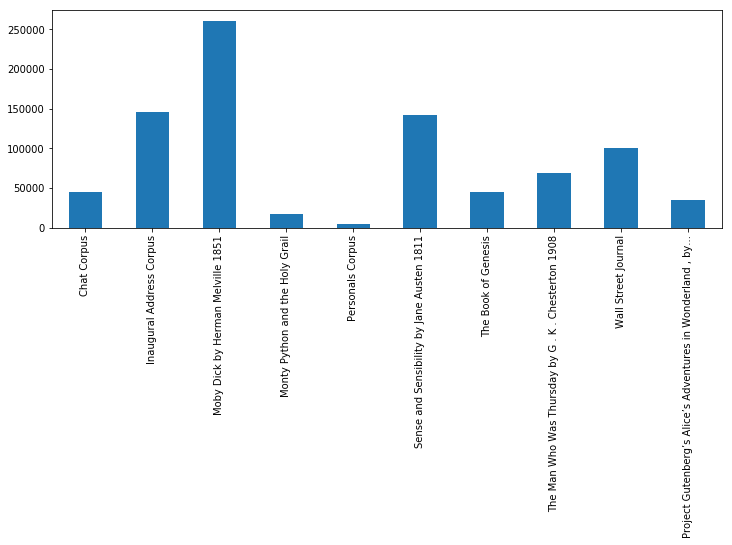

In [19]:
pd.Series(lengths).plot(kind='bar')

But word counts themselves are not very interesting, so let's see if we can not only count the words, 
but count the vocabulary of a text. To do that, we can use `set()`, which will count every word once. 

In [20]:
porky_sentence = "the the the the the that's all folks"
porky_words = porky_sentence.split()
porky_words

['the', 'the', 'the', 'the', 'the', "that's", 'all', 'folks']

We can count the words in the sentence easily: 

In [21]:
len(porky_words)

8

To count the words, but ignore repeated words, we can use the function set(). 

In [22]:
set(porky_words)

{'all', 'folks', "that's", 'the'}

So if we count this set, we can determine the vocabulary of a text:

In [23]:
len(set(porky_words))

4

Let's see if we can find the vocabulary of Moby Dick.

In [24]:
len(set(text1))

19317

Pretty big, but then again, Moby Dick is kind of a long novel. 
We can adjust for the words by adjusting for the total words: 

In [25]:
len(text1) / len(set(text1))

13.502044830977896

This would get tedious if we did this for every text, so let's write a function!

In [26]:
def vocab(text):                       # Define a function called `vocab` that takes the input `text` 
    return len(text) / len(set(text))  # Divide the number of words by the number of unique words.  

In [27]:
vocab(porky_words)

2.0

Let's go through each text, and get its vocabulary, and put it in a table. 

In [28]:
vocabularies = {text.name: vocab(text) for text in alltexts}

Let's put that table into Pandas so we can see it better: 

In [29]:
pd.Series(vocabularies)

Chat Corpus                                                       7.420046
Inaugural Address Corpus                                         14.941050
Moby Dick by Herman Melville 1851                                13.502045
Monty Python and the Holy Grail                                   7.833333
Personals Corpus                                                  4.392599
Sense and Sensibility by Jane Austen 1811                        20.719450
The Book of Genesis                                              16.050197
The Man Who Was Thursday by G . K . Chesterton 1908              10.167915
Wall Street Journal                                               8.113798
﻿Project Gutenberg’s Alice’s Adventures in Wonderland , by...     8.775586
dtype: float64

Now let's plot that:

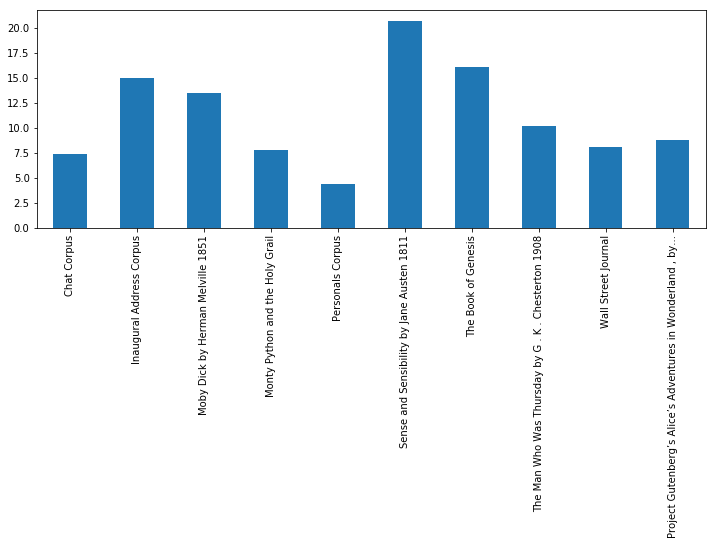

In [30]:
pd.Series(vocabularies).plot(kind='bar')

OK, now let's make a famous wordcloud from a text. This just takes the most statistically significant words, and plots them where the size of each word corresponds to its frequency. 

In [31]:
from wordcloud import WordCloud # Get the library

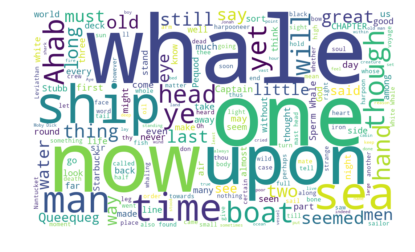

In [40]:
rawtext = ' '.join(text1.tokens) # Stitch it back together. 
wc = WordCloud(width=1000, height=600, background_color='white').generate(rawtext)
# This just makes the plot size bigger, so that we can see it easier. 
plt.rcParams['figure.figsize'] = (12,4)
plt.figure()
plt.axis('off')                          # Turn off axis ticks
plt.imshow(wc, interpolation="bilinear");# Plot it

# Plotting Words (Conditional Frequency Distributions)

Now let's take a look at the inaugural address corpus in detail. 

In [33]:
from nltk.corpus import inaugural

We'll set up a conditional word frequency distribution for it, 
pairing off a list of words with the list of inaugural addresses. 

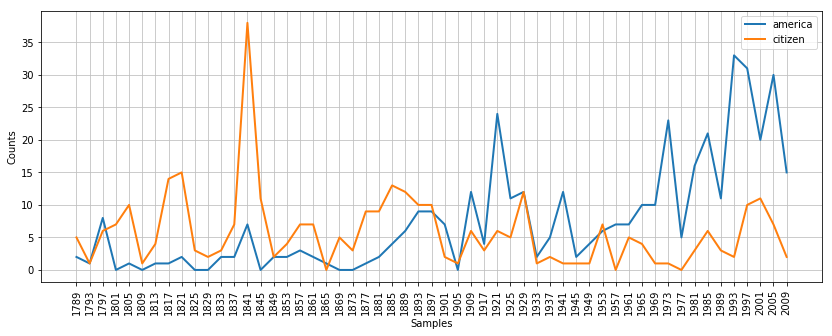

In [34]:
plt.rcParams['figure.figsize'] = (14,5) # Adjust the plot size. 
cfd = nltk.ConditionalFreqDist(
           (target, fileid[:4])
           for fileid in inaugural.fileids()
           for w in inaugural.words(fileid)
           for target in ['america', 'citizen']
           if w.lower().startswith(target))
cfd.plot()

You can replace the words 'america' and 'citizen' here with whatever words you want, to further explore this corpus.

Now let's play around with the Brown corpus. It's a categorized text corpus. Let's see all the categories: 

In [35]:
nltk.corpus.brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

Now let's create another conditional frequency distribution, this time based on these genres. 

In [36]:
genres = ['adventure', 'romance', 'science_fiction']
words = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = nltk.ConditionalFreqDist(
              (genre, word)
              for genre in genres
              for word in nltk.corpus.brown.words(categories=genre)
              if word in words)

In [37]:
cfdist

ConditionalFreqDist(nltk.probability.FreqDist,
                    {'adventure': FreqDist({'can': 46,
                               'could': 151,
                               'may': 5,
                               'might': 58,
                               'must': 27,
                               'will': 50}),
                     'romance': FreqDist({'can': 74,
                               'could': 193,
                               'may': 11,
                               'might': 51,
                               'must': 45,
                               'will': 43}),
                     'science_fiction': FreqDist({'can': 16,
                               'could': 49,
                               'may': 4,
                               'might': 12,
                               'must': 8,
                               'will': 16})})

Finally, we can plot these words by genre: 

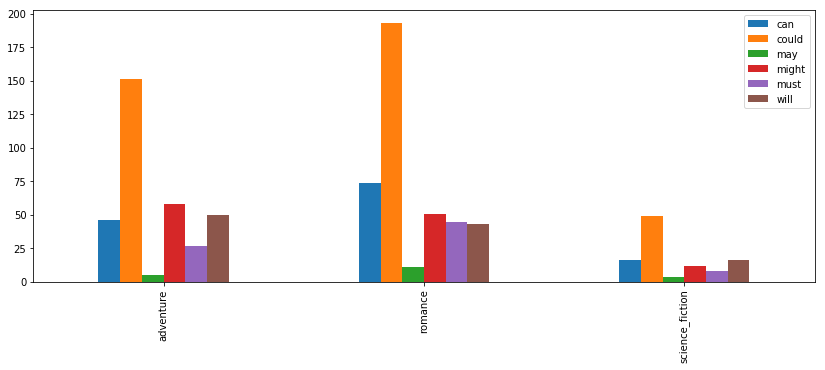

In [38]:
pd.DataFrame(cfdist).T.plot(kind='bar')

Play around with this CFD a bit by changing the genres and words used above. 

# Further resources

To learn more, check out the NLTK book (from which a lot of the examples here were adapted): http://nltk.org/book

To see what's possible with more advanced techniques, using the [SpaCy](http://spacy.io) library, check out [my workshop notebook in advanced text analysis](https://github.com/JonathanReeve/advanced-text-analysis-workshop-2017/blob/master/advanced-text-analysis.ipynb). 

Read about some experiments in text analysis on my blog: http://jonreeve.com